# 1. 퍼셉트론 : 가장 간단한 신경망
- 뉴런을 본 따 만들어 입력, 출력이 있고 신호는 입력->출력 방향으로 흐름
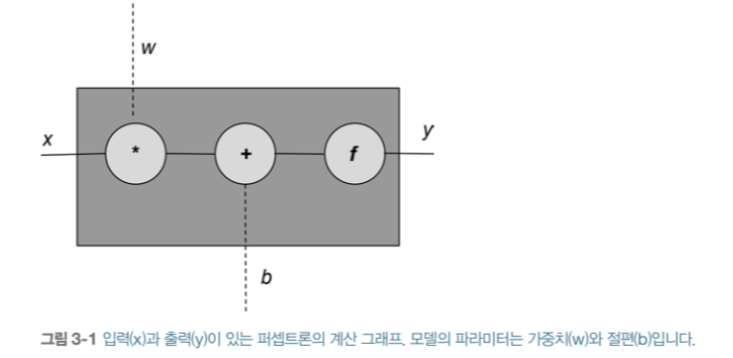
- 가중치와 절편은 데이터에서 학습됨
- 활성화 함수는 신경망과 타깃 출력을 기반으로 설계자의 직관에 따라 결정됨
- y = f(wx + b)
- f의 활성화 함수는 비선형 함수, wx+b는 선형 함수(아핀변환)
- 퍼셉트론은 선형함수와 비선형 함수의 조합

In [2]:
import torch
import torch.nn as nn

class Perceptron(nn.Module):
  """ 퍼셉트론은 하나의 선형 층입니다 """
  def __init__(self, input_dim):
    """
    매개변수 :
      input_dim (int) : 입력 특성의 크기
    """

    super(Perceptron, self).__init__()
    self.fc1 = nn.Linear(input_dim, 1) # torch.nn 모듈 아래 가중치와 절편에 필요한 부가 작업 수행

  def forward(self, x_in):
    """ 퍼셉트론의 정방향 계산

    매개변수 :
      x_in (torch.Tensor): 입력 데이터 텐서
        x_in.shape는 (batch, num_features)입니다.

    반환값 :
      결과 텐서 : tensor.shape는 (batch,) 입니다.
    """
    return torch.sigmoid(self.fc1(x_in)).squeeze()

# 2. 활성화 함수
- 비선형 함수, 신경망에서 데이터의 복잡한 관계 감지


## 1) 시그모이드
- 임의의 실수값을 받아 0과 1 사이의 범위로 압축
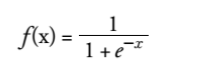
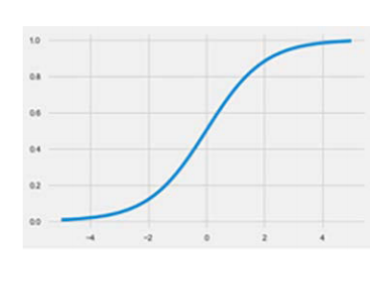


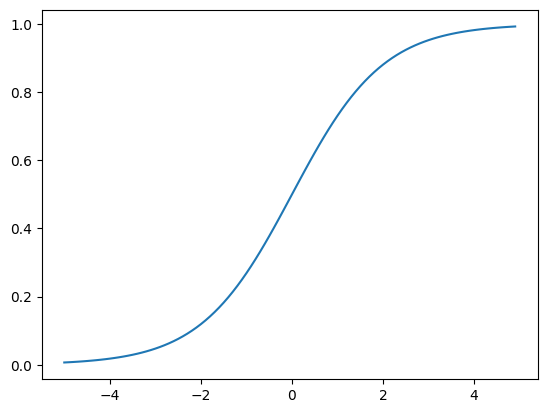

In [ ]:
import torch
import matplotlib.pyplot as plt

# torch.range 대신 torch.arange 사용
x = torch.arange(-5., 5., 0.1)

# 시그모이드 함수 적용
y = torch.sigmoid(x)

# x와 y를 각각 numpy 배열로 변환 후 플롯 생성
plt.plot(x.numpy(), y.numpy())
plt.show()

- 입력 범위 대부분에서 빠르게 포화됨 (극단적인 출력 생성)
- 그레디언트 소실 문제: 그레디언트가 0
- 그레디언트 폭주 문제: 부동소스 오버플로우가 됨
- -> 시그모이드 활성화 함수 거의 출력층에서만 사용 (확률 압축)

## 2) 하이퍼볼릭 탄젠트
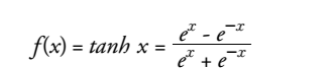
- 시그모이드 함수의 선형 변환
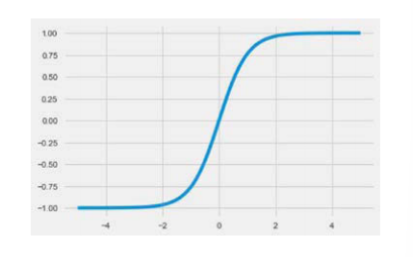
- 전범위의 실수값을 [-1, +1] 로 바꿈

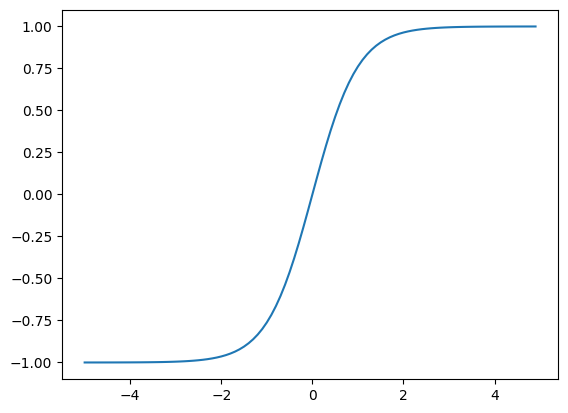

In [ ]:
import torch
import matplotlib.pyplot as plt

x = torch.arange(-5., 5., 0.1)
y = torch.tanh(x)

plt.plot(x.numpy(), y.numpy())
plt.show()

## 3) 렐루
- 가장 중요한 활성화 함수
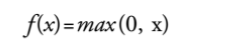
- 음숫값을 0으로 자르는 것
- 음수를 제거해서 그레디언트 소실 문제 도움됨
- 죽은 렐루 문제 : 시간이 지나서 신경망 특정 출력이 0이되면 다시 돌아오지 않는 문제
- -> 보완 : 리키렐루 PreLU 개발

### 3-1) PReLU
- 누수 파라미터 a는 학습되는 파라미터
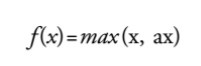
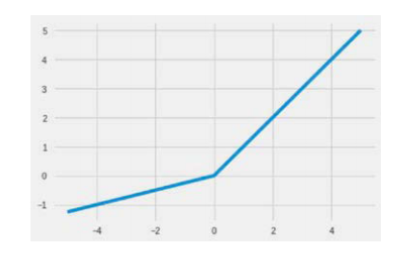

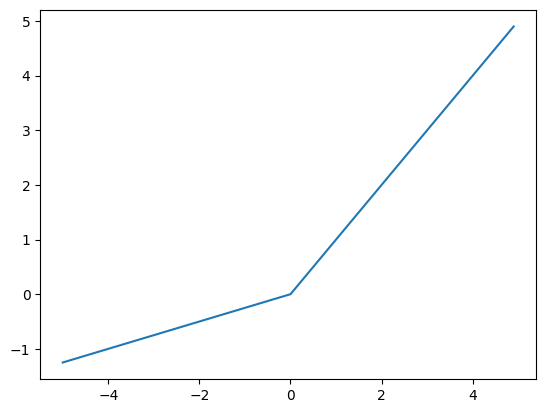

In [ ]:
import torch
import matplotlib.pyplot as plt

# x 텐서 생성 (requires_grad=True로 설정된 경우)
x = torch.arange(-5., 5., 0.1, requires_grad=True)

# 예를 들어 PReLU 활성화 함수 적용 (PReLU는 Parametric ReLU로, 비선형 활성화 함수 중 하나)
prelu = torch.nn.PReLU()
y = prelu(x)

# 텐서에서 그래프 분리 후 numpy 배열로 변환하여 플롯 생성
plt.plot(x.detach().numpy(), y.detach().numpy())
plt.show()

## 4) 소프트맥스
- 신경망 유닛의 출력을 0과 1로 압축
- 모든 출력의 합으로 각 출력을 나누어 k의 클래스에 대한 이산 확률 분포를 만듦
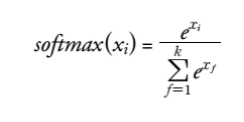
- 소프트맥스의 출력의 합은 1
- 분류 작업의 출력 해석시 유용 (이진분류 - 시그모이드 사용, 다중분류 - 소프트맥스 사용)
- 범주형 크로스 엔트로피와 함께 사용 (확률 기반의 목적 함수)

In [ ]:
import torch.nn as nn
import torch

softmax = nn.Softmax(dim=1)
x_input = torch.randn(1,3)
y_output = softmax(x_input)
print(x_input)
print(y_output)
print(torch.sum(y_output, dim=1))

tensor([[1.1729, 0.2512, 0.4471]])
tensor([[0.5314, 0.2114, 0.2572]])
tensor([1.0000])


# 3. 손실 함수
- 정답(y)와 예측(y hat)을 입력으로 받아 손실함수는 실수값 점수 만듦
- 점수가 높을수록 모델의 예측 성능이 나빠짐

## 3) 평균 제곱 오차 손실 (Mean Squared Error)
- 신경망의 출력(y hat)과 타깃(y)이 연속값인 회귀문제에서 사용
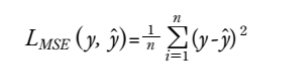
- 예측값과 타깃값의 차이를 제곱하여 평균한 값

In [1]:
import torch
import torch.nn as nn

mse_loss = nn.MSELoss()
outputs = torch.randn(3, 5, requires_grad = True)
targets = torch.randn(3,5)
loss = mse_loss(outputs, targets)

print(loss)

tensor(2.9300, grad_fn=<MseLossBackward0>)


## 2) 범주형 크로스 엔트로피 손실 (Categorical Cross Entropy Loss)
- 다중 분류 문제에 사용 : 클래스 소속 확률에 대한 예측
- 타깃(y)는 모든 클래스에 대한 다항분포를 나타내는 원소 n개로 이루어진 벡터
- 하나의 클래스만 정답이면 이 벡터는 원-핫 벡터
- 출력(y hat)도 원소 n개로 구성된 벡터, 다항분포에 대한 신경망의 예측
- 벡터 (y, y hat)을 비교해 손실 계산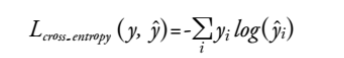
- 신경망 출력과 손실 함수 간의 관계를 결정하는 정보 4가지
  - 수의 범위 제한
  - 소프트맥스 함수에 사용한 지수함수의 입력이 음수면 매우 작은수, 양수면 매우 큰 수
  - 신경망 출력은 소프트맥스 적용 직전의 벡터라고 가정
  - 로그함수는 지수함수의 역함수
  - -> 이 4가지로 로그함수를 수학적 간소화하여 수치적으로 안정적인 계산 수행 & 너무 작거나 큰 값 피함
  - -> 간소화의 결과로 소프트맥스 사용하지 않고 신경망 출력에 CrossEntropyLoss를 함께 사용해서 최적화 수행

In [2]:
import torch
import torch.nn as nn

ce_loss = nn.CrossEntropyLoss()
outputs = torch.randn(3,5, requires_grad = True)
targets = torch.tensor([1, 0, 3], dtype = torch.int64)
loss = ce_loss(outputs, targets)
print(loss)

tensor(2.7501, grad_fn=<NllLossBackward0>)


## 3) 이진 크로스 엔트로피 손실 (Binary Cross-Entropy Loss)
- 클래스 2개일 경우 유용

In [4]:
import torch
import torch.nn as nn

bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()
probabilities = sigmoid(torch.randn(4,1, requires_grad=True))
targets = torch.tensor([1,0,1,0], dtype= torch.float32).view(4,1)
loss = bce_loss(probabilities, targets)

print(probabilities)
print(loss)

tensor([[0.2932],
        [0.6075],
        [0.1204],
        [0.7008]], grad_fn=<SigmoidBackward0>)
tensor(1.3715, grad_fn=<BinaryCrossEntropyBackward0>)


# 4. 지도학습 훈련 알아보기
- 모델, 손실함수, 훈련데이터, 최적화 알고리즘이 필요
- 훈련 데이터 : 샘플과 타깃의 쌍
- 모델 : 샘플에 대한 예측 계산
- 손실 함수 : 타깃과 비교하여 예측의 오차 측정
- 훈련 목표 : 그레디언트 기반의 최적화 알고리즘으로 모델의 파라미터 조정하여 낮은 손실을 내는 것
- 예시 : 2차원 데이터 포인트를 2개 중 하나로 분류
  - 2차원이므로 직선 하나를 학습하는 것
  - 결정경계/초평면 : 한 클래스 포인트를 다른 클래스와 구분하는 것

## 1) 예제 데이터 만들기
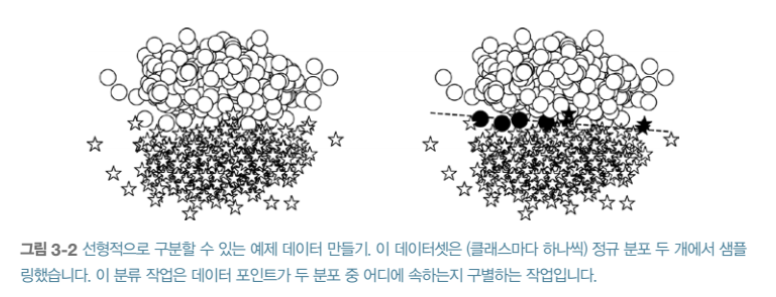

## 2) 모델 선택
- 퍼셉트론 : 어떤 크기의 입력도 다룰 수 있음
- 활성화 함수는 시그모이드

## 3) 확률을 클래스로 변환하기
- 결정 경계 적용해 출력  확률을 2개의 클래스로 바꿈
- 일반적으로 결정 경계는 0.5로 지정

## 4) 손실 함수 선택
- 손실함수 : 출력이 확률이면 크로스 엔트로피 기반의 손실함수 선택

## 5) 옵티마이저 선택
- 옵티마이저가 오차신호를 사용해 모델의 가중치 업데이트
- 가장 간단한 구조시 하이퍼파라미터(학습률) 하나로 옵티마이저의 업데이트 동작 제어
- 학습률 : 오차신호 가중치 업데이트에 영향을 얼마나 미치는지 조절
- 큰 학습률 : 가중치가 크게 바뀌고 수렴에 영향
- 작은 학습률 : 훈련 진행 속도가 심하게 느려짐
- 종류
  - SGD : 고전적 알고리즘
  - Adagrad : 적응형 옵티마이저
  - Adam : 적응형 옵티마이저, 0.01이 기본

In [3]:
import torch.nn as nn
import torch.optim as optim

input_dim = 2
lr = 0.001

perceptron = Perceptron(input_dim = input_dim)
bce_loss = nn.BCELoss()
optimizer = optim.Adam(params=perceptron.parameters(), lr=lr)

## 6) 모두 합치기 : 그레디언트 기반의 지도학습

- 손실의 그레디언트 : 모델 파라미터를 얼마나 많이 바뀌어야 하는지 나타내는 신호
- 각 파라미터의 그레디언트 : 파라미터에 대한 손실값의 순간 변화율(미분)
- 그레디언트 기반의 모델 훈련 : 각 파라미터에 대한 손실의 그레디언트로 해당 파라미터 반복 업데이트 수행
  - 모델 내의 그레디언트 부가정보를 초기화 (zero_grad() 함수 사용)
  - 모델이 입력 데이터(x_data)에 대한 출력(y_pred) 계산
  - 모델 출력(y_pred)과 기대하는 타깃(y_target)을 비교해 손실 계산
  - 파이토치 손실 객체에는 backward() 메서드 사용해서 손실 반복해서 전파, 각 파라미터에 대한 그레디언트 계산
  - 옵티마이저(opt) step() 함수로 파라미터에 그레디언트 업데이트 지시
- 전체 훈련 데이터셋은 배치(batch)로 분할됨, 그레디언트 각 단계는 배치 1개에서 수행
  - batch_size : 배치 크기 지정
  - 훈련 데이터셋 고정, 배치 크기 늘림 -> 배치 개수 줄어듦
  - 미니배치 : 각 배치가 훈련 데이터 크기보다 훨씬 작을 경우를 부각
- 에포크 : 완전한 훈련 반복 한번
  - 에포크 당 배치 수 = 데이터셋 배치 수 : 에포크는 데이터셋에 대한 완전한 반복 1번

  


In [4]:
# 각 에포크는 전체 훈련 데이터를 사용
for epoch_i in range(n_epochs):
  # 내부 반복은 데이터셋에 있는 배치에 대해 수행
  for batch_i in range(n_batches):

    # 0단계 : 데이터 가져오기
    x_data, y_target = get_toy_data(batch_size)

    # 1단계 : 그레디언트 초기화
    perceptron.zero_grad()

    # 2단계 : 모델의 정방향 계산 수행
    y_pred = perceptron(x_data, apply_sigmoid=True)

    # 3단계 : 최적하려는 손실 게산하기
    loss = bce_loss(y_pred, y_target)

    # 4단계 : 손솔 신호를 거꾸로 전파하기
    loss.backward()

    # 5단계 : 옵티마이저로 업데이트하기
    optimizer.step()

NameError: name 'n_epochs' is not defined

# 5. 부가적인 훈련 개념

## 1) 모델 성능 올바르게 측정하기 : 평가지표
- 정확도 : 훈련하는 동안 만나지 못한 데이터에 대해 올바르게 예측한 비율

## 2) 모델 성능 올바르게 측정하기 : 데이터 분할
-